In [1]:
import pandas as pd

In [3]:
# Load the metadata CSV file
metadata_df = pd.read_csv('train.csv')
print(metadata_df.head())  # Display the first few rows to check the data

       eeg_id  eeg_sub_id  eeg_label_offset_seconds  spectrogram_id  \
0  1628180742           0                       0.0          353733   
1  1628180742           1                       6.0          353733   
2  1628180742           2                       8.0          353733   
3  1628180742           3                      18.0          353733   
4  1628180742           4                      24.0          353733   

   spectrogram_sub_id  spectrogram_label_offset_seconds    label_id  \
0                   0                               0.0   127492639   
1                   1                               6.0  3887563113   
2                   2                               8.0  1142670488   
3                   3                              18.0  2718991173   
4                   4                              24.0  3080632009   

   patient_id expert_consensus  seizure_vote  lpd_vote  gpd_vote  lrda_vote  \
0       42516          Seizure             3         0         0   

In [10]:
# data loaders
def load_eeg_data(eeg_id):
    # Adjust the path and file reading method according to your data format
    file_path = f'train_eegs/{eeg_id}.parquet'  # Modify path as needed
    eeg_data = pd.read_parquet(file_path)
    return eeg_data

def load_spectrogram_data(spectrogram_id):
    # Adjust the path and file reading method according to your data format
    file_path = f'train_spectrograms/{spectrogram_id}.parquet'  # Modify path as needed
    spectrogram_data = pd.read_parquet(file_path)
    return spectrogram_data

In [12]:
import matplotlib.pyplot as plt

# Load EEG and spectrogram data for the first record in the DataFrame
first_record = metadata_df.iloc[0]
eeg_data = load_eeg_data(first_record['eeg_id'])
spectrogram_data = load_spectrogram_data(first_record['spectrogram_id'])

# Display EEG data summary
print(eeg_data.head())
print(spectrogram_data.head())

# If spectrogram data is stored as an array inside the DataFrame
if 'spectrogram' in spectrogram_data.columns:
    plt.imshow(spectrogram_data['spectrogram'].iloc[0], cmap='gray')
    plt.title('Spectrogram')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.show()

         Fp1         F3         C3          P3          F7          T3  \
0 -80.519997 -70.540001 -80.110001 -108.750000 -120.330002  -88.620003   
1 -80.449997 -70.330002 -81.760002 -107.669998 -120.769997  -90.820000   
2 -80.209999 -75.870003 -82.050003 -106.010002 -117.500000  -87.489998   
3 -84.709999 -75.339996 -87.480003 -108.970001 -121.410004  -94.750000   
4 -90.570000 -80.790001 -93.000000 -113.870003 -129.960007 -102.860001   

           T5          O1          Fz          Cz         Pz        Fp2  \
0 -101.750000 -104.489998  -99.129997  -90.389999 -97.040001 -77.989998   
1 -104.260002  -99.730003  -99.070000  -92.290001 -96.019997 -84.500000   
2  -99.589996  -96.820000 -119.680000  -99.360001 -91.110001 -99.440002   
3 -105.370003 -100.279999 -113.839996 -102.059998 -95.040001 -99.230003   
4 -118.599998 -101.099998 -107.660004 -102.339996 -98.510002 -95.300003   

           F4          C4          P4         F8         T4          T6  \
0  -88.830002 -112.120003 -10

# EDA of Spectrogram Data

In [15]:
print(spectrogram_data.describe())

             time     LL_0.59     LL_0.78     LL_0.98     LL_1.17     LL_1.37  \
count  320.000000  320.000000  320.000000  320.000000  320.000000  320.000000   
mean   320.000000    4.354875    6.255469    8.247343    9.557375   10.627500   
std    185.040536    2.296027    2.952741    3.428192    3.912668    4.230537   
min      1.000000    1.180000    1.670000    2.570000    2.370000    1.980000   
25%    160.500000    2.857500    4.207500    5.745000    6.727500    7.652500   
50%    320.000000    3.895000    5.565000    7.690000    8.870000   10.080000   
75%    479.500000    5.052500    7.472500   10.085000   11.775000   13.245000   
max    639.000000   17.389999   20.580000   21.070000   23.459999   29.139999   

          LL_1.56     LL_1.76     LL_1.95     LL_2.15  ...    RP_18.16  \
count  320.000000  320.000000  320.000000  320.000000  ...  320.000000   
mean    12.026468   13.306719   14.755376   16.029657  ...    0.343406   
std      4.952774    5.225338    5.302315    5.4

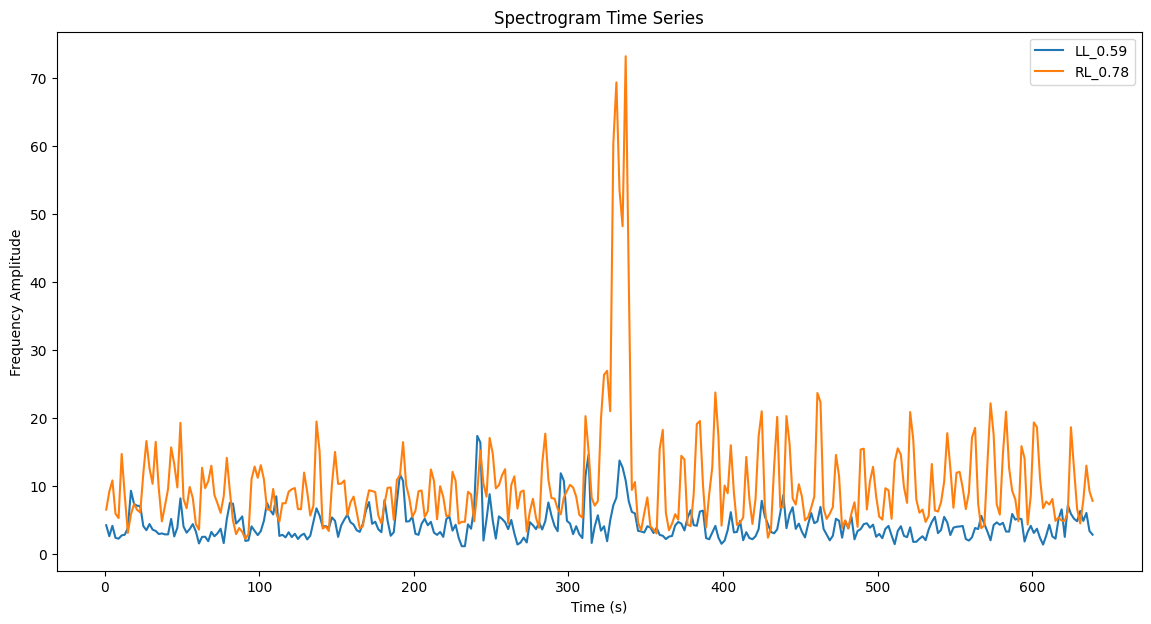

In [16]:
import matplotlib.pyplot as plt

# Plotting some selected channels across time
plt.figure(figsize=(14, 7))
plt.plot(spectrogram_data['time'], spectrogram_data['LL_0.59'], label='LL_0.59')
plt.plot(spectrogram_data['time'], spectrogram_data['RL_0.78'], label='RL_0.78')
plt.xlabel('Time (s)')
plt.ylabel('Frequency Amplitude')
plt.title('Spectrogram Time Series')
plt.legend()
plt.show()

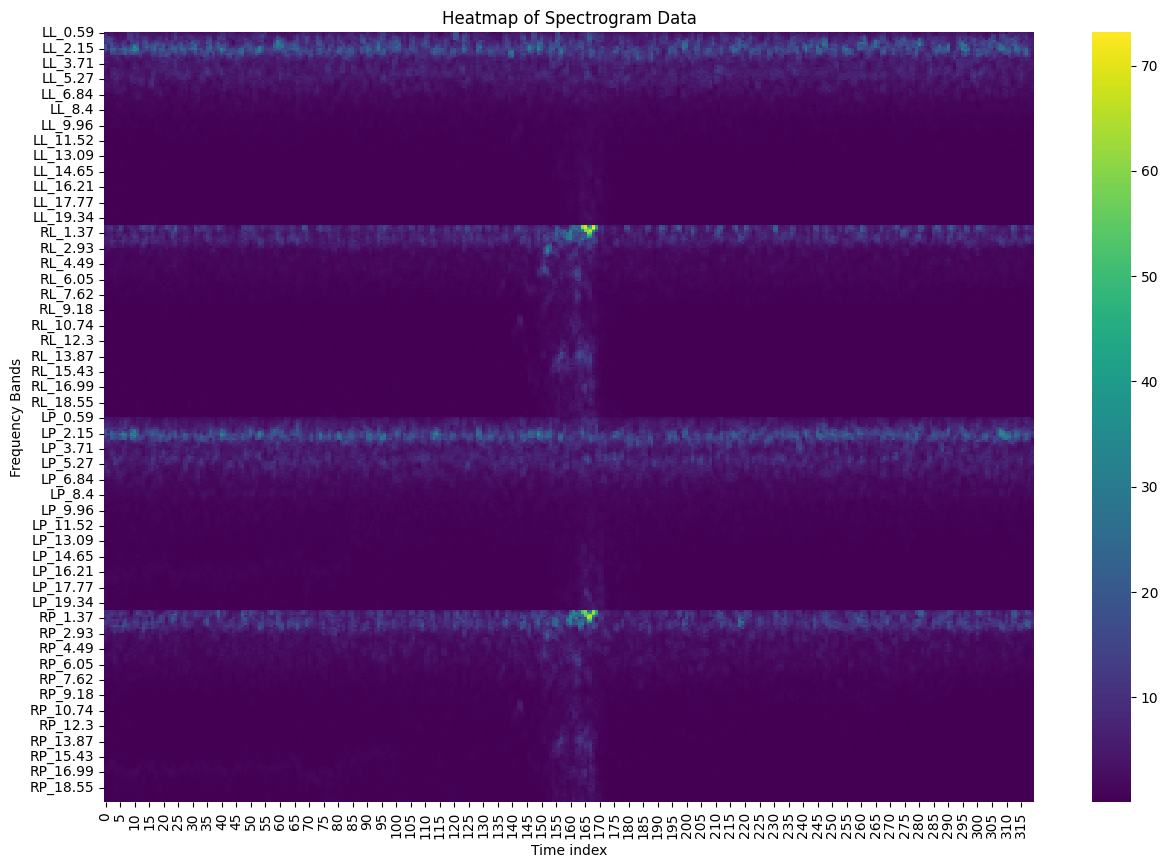

In [17]:
import seaborn as sns

# Dropping the 'time' column for heatmap purposes
heat_df = spectrogram_data.drop('time', axis=1)

plt.figure(figsize=(15, 10))
sns.heatmap(heat_df.T, cmap='viridis')
plt.title('Heatmap of Spectrogram Data')
plt.xlabel('Time index')
plt.ylabel('Frequency Bands')
plt.show()

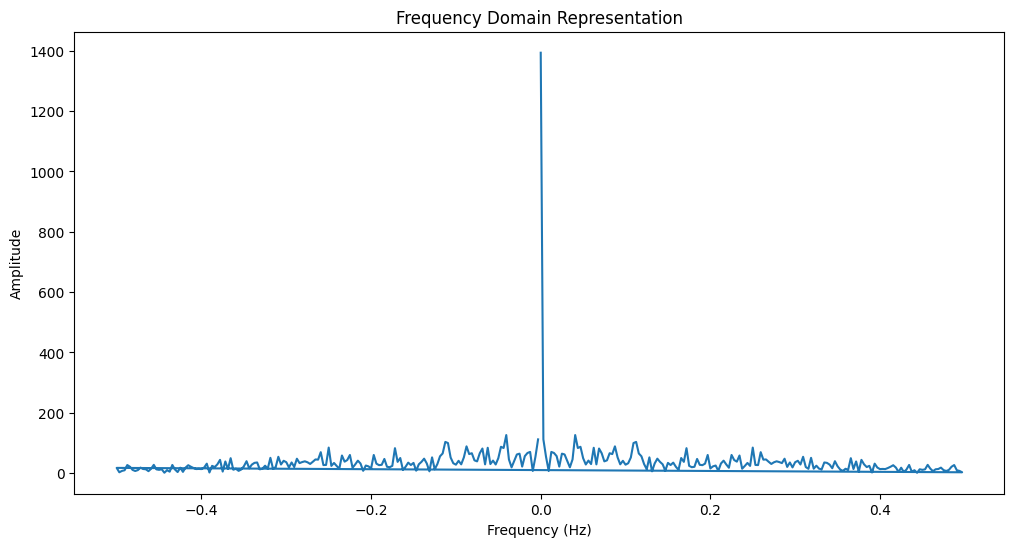

In [18]:
# Select a single segment to perform a Fourier Transform
import numpy as np

data_segment = spectrogram_data['LL_0.59']
fft_result = np.fft.fft(data_segment)
frequencies = np.fft.fftfreq(len(fft_result))

plt.figure(figsize=(12, 6))
plt.plot(frequencies, np.abs(fft_result))
plt.title('Frequency Domain Representation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()


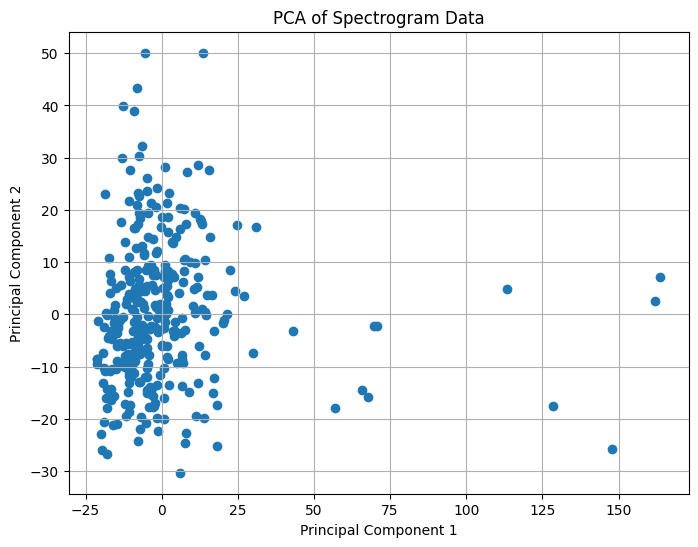

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(heat_df)
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

plt.figure(figsize=(8, 6))
plt.scatter(principal_df['Principal Component 1'], principal_df['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Spectrogram Data')
plt.grid(True)
plt.show()
